load the data


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interactive
import panel as pn
pn.extension()


In [2]:
def get_config():
    with open("config.yaml", "r") as my_config:
        config = yaml.safe_load(my_config)
    return config
config = get_config()

df_before_plaque = pd.read_csv(config['plaque'])
df_after_plaque = pd.read_csv(config['plaque2'])

df1 = pd.read_csv(config['gum_bleeding'])
df2 = pd.read_csv(config['gum_bleeding2'])

df_before_ph = pd.read_csv(config['ph'])
df_after_ph = pd.read_csv(config['ph2'])

# Specified colors (corrected hex codes)
colors = ['#FE7F2D', '#619B8A', '#FCCA46', '#A1C181', '#233D4D']

Launching server at http://localhost:45439


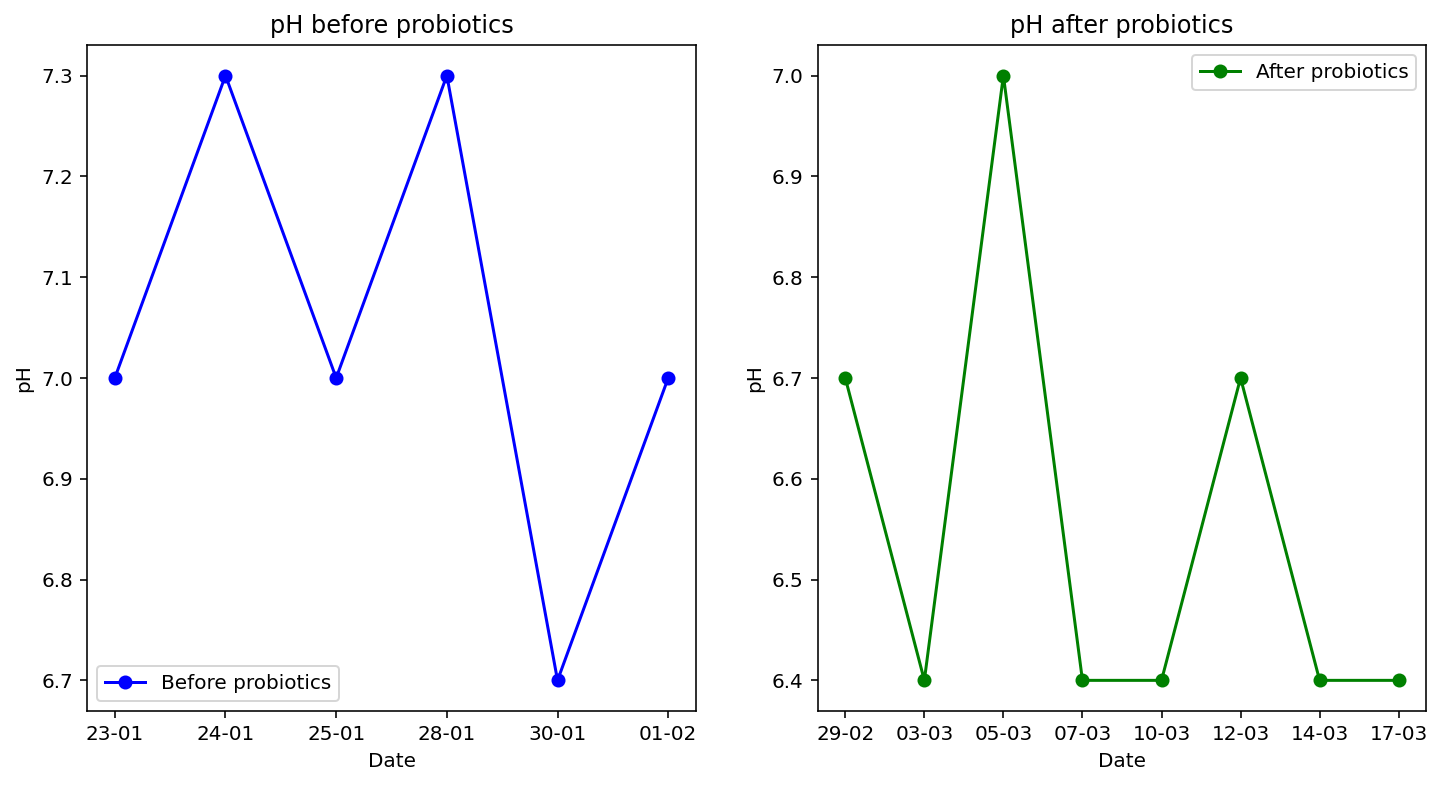

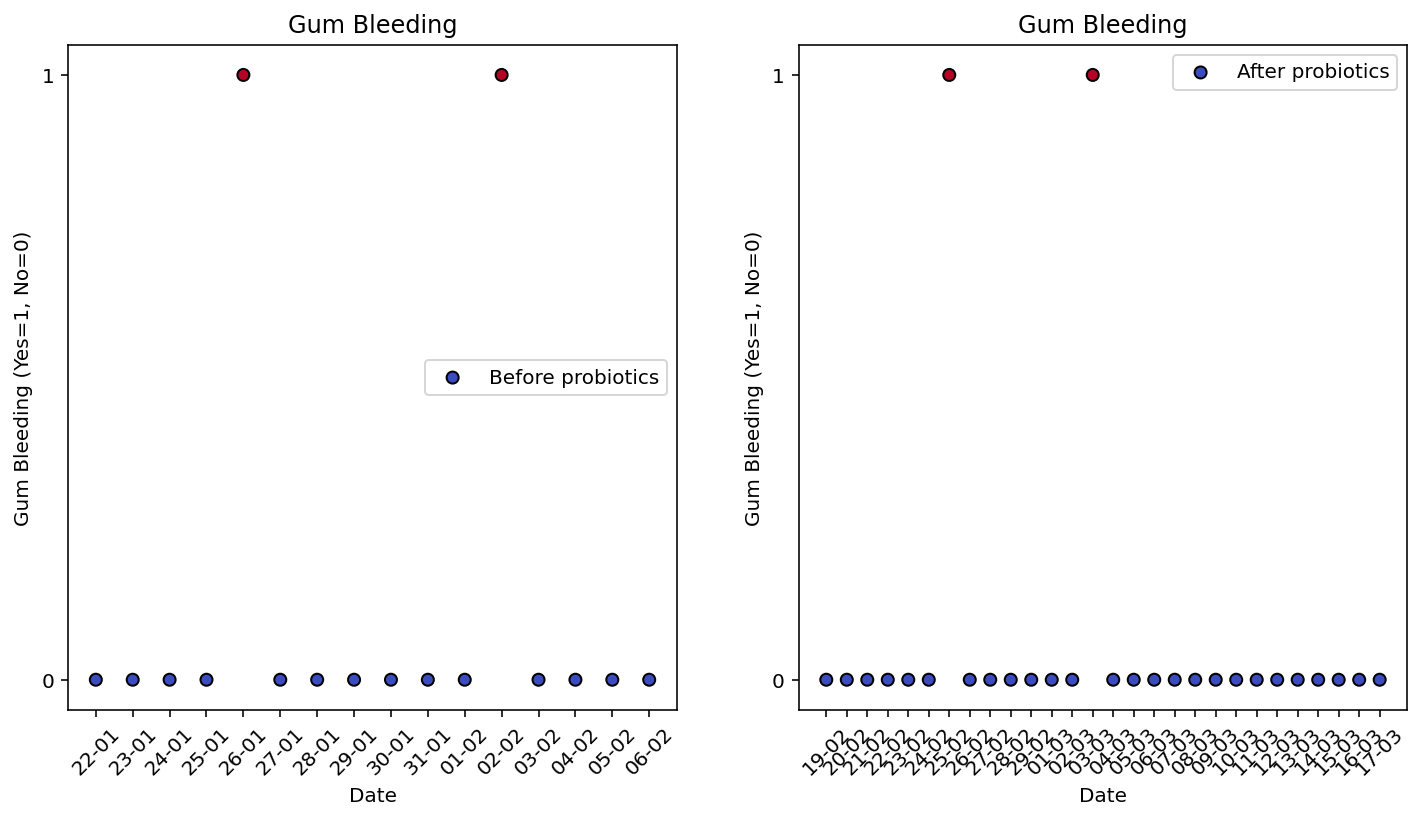

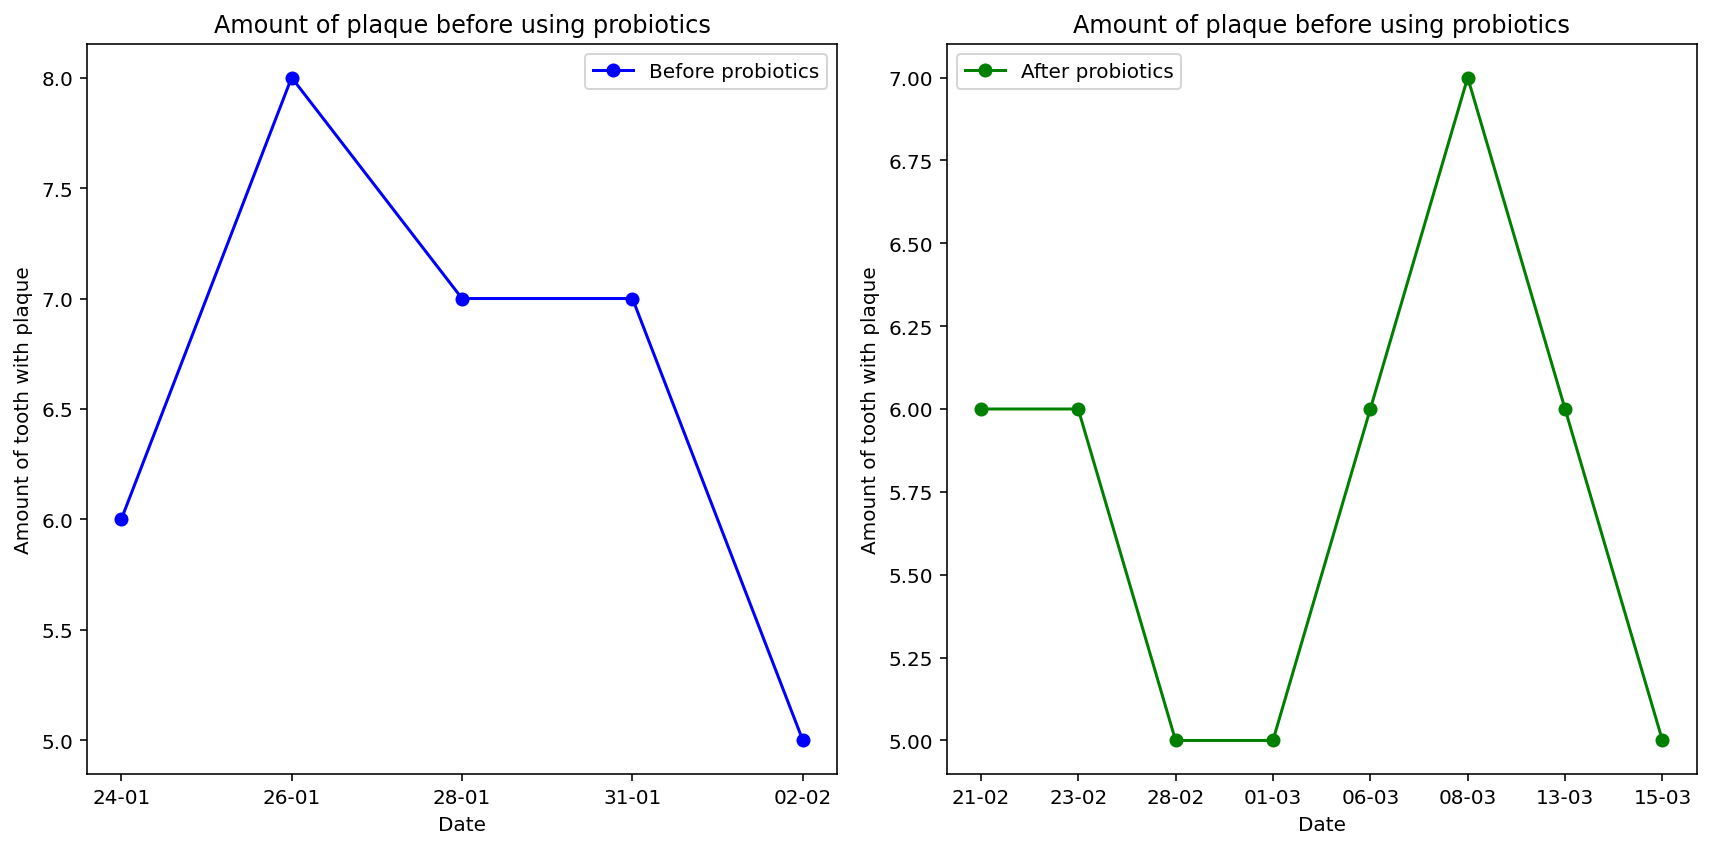

In [5]:

# Function to plot data for selected participant for pH plots
def plot_ph_data(participant):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
   
    if participant in df_before_ph.columns:
        df_before_ph_sorted = df_before_ph.sort_values(by='Weeks').dropna()
        df_before_ph_sorted['Weeks'] = pd.to_datetime(df_before_ph_sorted['Weeks'])
        weeks_before_ph = df_before_ph_sorted['Weeks'].dt.strftime('%d-%m')
        axes[0].plot(weeks_before_ph, df_before_ph_sorted[participant], marker='o', label='Before probiotics', color='blue')

    if participant in df_after_ph.columns:
        df_after_ph_sorted = df_after_ph.sort_values(by='Weeks').dropna()
        df_after_ph_sorted['Weeks'] = pd.to_datetime(df_after_ph_sorted['Weeks'])
        weeks_after_ph = df_after_ph_sorted['Weeks'].dt.strftime('%d-%m')
        axes[1].plot(weeks_after_ph, df_after_ph_sorted[participant], marker='o', label='After probiotics', color='green')

    axes[0].set_title(f'pH before probiotics')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('pH')
    axes[0].legend()

    axes[1].set_title(f'pH after probiotics')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('pH')
    axes[1].legend()
   
    return fig

# Function to plot data for selected participant for gum bleeding plots
def plot_gum_bleeding_data(participant):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
   
    if participant in df1.columns and participant in df2.columns:
        df1_sorted = df1.sort_values(by='Weeks').dropna()
        df1_sorted['Weeks'] = pd.to_datetime(df1_sorted['Weeks'])
        weeks_before_gumbleeding = df1_sorted['Weeks'].dt.strftime('%d-%m')
        y_values1 = df1_sorted[participant].map({'Yes': 1, 'yes': 1, 'No': 0, 'no': 0})

        df2_sorted = df2.sort_values(by='Weeks').dropna()
        df2_sorted['Weeks'] = pd.to_datetime(df2_sorted['Weeks'])
        weeks_after_gumbleeding = df2_sorted['Weeks'].dt.strftime('%d-%m')
        y_values2 = df2_sorted[participant].map({'Yes': 1, 'yes': 1, 'No': 0, 'no': 0})
       
        # Plot for the first CSV
        axes[0].scatter(weeks_before_gumbleeding, y_values1, c=y_values1, cmap='coolwarm', edgecolor='k', label='Before probiotics')

        # Plot for the second CSV
        axes[1].scatter(weeks_after_gumbleeding, y_values2, c=y_values2, cmap='coolwarm', edgecolor='k', label='After probiotics')

    axes[0].set_title('Gum Bleeding')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Gum Bleeding (Yes=1, No=0)')
    axes[0].set_yticks([0, 1])
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].legend()

    axes[1].set_title('Gum Bleeding')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Gum Bleeding (Yes=1, No=0)')
    axes[1].set_yticks([0,1])
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend()

    return fig

# Function to plot data for selected participant for plaque plots
def plot_plaque_data(participant):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
   
    if participant in df_before_plaque.columns:
        df_before_plaque_sorted = df_before_plaque.sort_values(by='Weeks').dropna()
        df_before_plaque_sorted['Weeks'] = pd.to_datetime(df_before_plaque_sorted['Weeks'])
        weeks_before_plaque = df_before_plaque_sorted['Weeks'].dt.strftime('%d-%m')
        axes[0].plot(weeks_before_plaque, df_before_plaque_sorted[participant], marker='o', label='Before probiotics', color='blue')

    if participant in df_after_plaque.columns:
        df_after_plaque_sorted = df_after_plaque.sort_values(by='Weeks').dropna()
        df_after_plaque_sorted['Weeks'] = pd.to_datetime(df_after_plaque_sorted['Weeks'])
        weeks_after_plaque = df_after_plaque_sorted['Weeks'].dt.strftime('%d-%m')
        axes[1].plot(weeks_after_plaque, df_after_plaque_sorted[participant], marker='o', label='After probiotics', color='green')

    axes[0].set_title('Amount of plaque before using probiotics')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Amount of tooth with plaque')
    axes[0].legend()

    axes[1].set_title('Amount of plaque before using probiotics')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Amount of tooth with plaque')
    axes[1].legend()

    plt.tight_layout()
    return fig


# Function to update plot based on selected participant
def update_plot(event):
    participant = event.new
    fig1 = plot_ph_data(participant)
    fig2 = plot_gum_bleeding_data(participant)
    fig3 = plot_plaque_data(participant)
    plot_pane1.object = fig1
    plot_pane2.object = fig2
    plot_pane3.object = fig3

# Create widgets for participants
participants = df_before_ph.columns[1:].tolist()
participant_selector = pn.widgets.Select(
    options=participants,
    value=participants[0],
    name='Participant'
)

# Register function update_plot as an event handler for changes in the Dropdown widget
participant_selector.param.watch(update_plot, 'value')

plot_pane1 = pn.pane.Matplotlib()
plot_pane2 = pn.pane.Matplotlib()
plot_pane3 = pn.pane.Matplotlib()


# Create a row for each plot type

participant_row= pn.Row(
    pn.Column(participant_selector),
    css_classes = ['panel-widget-box']
)

row_ph = pn.Row(
    pn.Column('# pH data', plot_pane1),
    css_classes=['panel-widget-box']
)

# Create a row for each plot type
row_gumbleeding = pn.Row(
    pn.Column('# Gum Bleeding data', plot_pane2),
    css_classes=['panel-widget-box']
)

# Create a row for each plot type
row_plaque = pn.Row(
    pn.Column('# Plaque data', plot_pane3),
    css_classes=['panel-widget-box']
)

dashboard_layout = pn.Column(
    participant_row,
    pn.Row(row_ph, row_plaque),
    row_gumbleeding,
    css_classes=['panel-widget-box']
)


# Create the dashboard
dashboard = pn.template.BootstrapTemplate(title='Dashboard MicroMouth Marvels', header_background='lightblue')
dashboard.main.append(dashboard_layout)
dashboard.show()